In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom

# Обшая информация о проекте

**Заголовок:** Анализ популярного сервиса аренды самокатов GoFast.

**Описание проекта:** В современном мире моблильность является одним из ключевым фактором, поэтому современные сервисы проката самоката набирают популярность. Одним из таких сервисов является GoFast. На основании собранных данных о пользователях и их поездках проведем сравнением тех, кто имеет подписку в сервисе с теми, кто её не имеет. Правильный анализ данных поможет GoFast улучшить свой сервис и повысить выручку компании.

**Цель исследования:** Определить какие пользователи тратят больше времени на поездки и рассчитать выручку, которую они приносят. Также произвести сравнение данных о пользователях с подпиской и без.

**Ход исследования:**

- Подготовка данных: загрузка и изучение общей информации из представленных датасетов.
- Предобработка данных: поиск пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- Расширение набора данных: добавление новых столбцов, таких как месяц, в котором была совершена та или иная поездка, и выручки, которую принесли пользователи.
- Статистический анализ данных: формирование и проверка гипотез о потраченном времени на поездки, о расстояние поездки и о ежемесячной выручке.

**Общий вывод:** резюмирование полуенных результатов, формулировка ключевых выводов и результатов.

#### Шаг 1. Загрузка данных

##### Считаем CSV-файлы

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

##### Выведим первые 10 строк каждого набора

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


*Из данных о пользователях видно, что пропущенных значений нет и все столбцы имеют корректный тип данных.*

In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


*Из данных о поездках каждого пользователя видно, что пропущенных значений нет и столбец с датой имеет вещественный тип данных.*

In [7]:
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


*Из данных о подписках видно, что пропущенных значений нет и все столбцы имеют корректный тип данных.*

#### Шаг 2. Предобработка данных

##### Приведем столбец даты из данных о поездках пользователей к формату даты

In [9]:
rides['date'] = pd.to_datetime(rides['date'])

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


##### Создадим столбец с номером месяца в данных о поездках пользователей

In [11]:
rides['month'] = rides['date'].dt.month

In [12]:
rides.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


##### Проверим на наличие пропущенных значений в данных о пользователях и об их поездках

###### Поиск пропущенных значений

**Проверим данные о пользователях**

In [13]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [14]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [16]:
users.loc[users['user_id'] == 0]

,user_id,name,age,city,subscription_type


In [17]:
    users.loc[users['age'] == 0]

,user_id,name,age,city,subscription_type


*После анализа данных о пользователях видно, что пропущенных данных нет.*

**Проверим данные о поездках пользователей**

In [18]:
rides.loc[rides['user_id'] == 0]

,user_id,distance,duration,date,month


In [19]:
rides.loc[rides['distance'] == 0]

,user_id,distance,duration,date,month


In [20]:
rides.loc[rides['duration'] == 0]

,user_id,distance,duration,date,month


*После анализа данных о поездках пользователях видно, что пропущенных данных нет.*

###### Поиск дубликатов

**Проверим данные о пользователях на дубликаты**

In [21]:
users.duplicated().sum()

31

Проверка на полные дубликаты выявила 31 дубликат. Это составляет примерно 2% от всех данных. Удалим их.

In [22]:
users_correct = users.drop_duplicates().reset_index(drop=True)

In [23]:
users_correct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [24]:
users_correct.duplicated(['user_id', 'subscription_type']).sum()

0

*Анализ на неполные дубликаты показал, что дубликатов в данных о пользователях не осталось.*

**Проверим данные о поездках пользователей на дубликаты**

In [25]:
rides.duplicated().sum()

0

Проверка не выявила полные дубликаты. Проверим на неполные.

In [26]:
rides.duplicated(['user_id', 'distance']).sum()

0

In [27]:
rides.duplicated(['user_id', 'duration']).sum()

5

Проверка выявила неполные дубликаты при анализе столбцов user_id и duration. Количество 5, что составляет меньше 0.5%. Удалим их.

In [28]:
rides_correct = rides.drop_duplicates(subset=['user_id', 'duration']).reset_index(drop=True)

In [29]:
rides_correct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18063 entries, 0 to 18062
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18063 non-null  int64         
 1   distance  18063 non-null  float64       
 2   duration  18063 non-null  float64       
 3   date      18063 non-null  datetime64[ns]
 4   month     18063 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.7 KB


In [30]:
print(f"Самая ранняя дата {rides_correct['date'].min()} и самая поздняя дата {rides_correct['date'].max()}. \
Из этого следует, что все данные за 2021 год.")

Самая ранняя дата 2021-01-01 00:00:00 и самая поздняя дата 2021-12-30 00:00:00. Из этого следует, что все данные за 2021 год.


In [31]:
rides_correct['distance'] = rides_correct['distance'].round(2)

In [32]:
rides_correct.loc[rides_correct['duration'] < 2]

,user_id,distance,duration,date,month
6531,701,4196.45,0.5,2021-08-31,8
6570,704,4830.82,0.5,2021-10-14,10
6680,712,4684.00,0.5,2021-03-04,3
6695,713,5215.64,0.5,2021-02-25,2
6768,718,5197.44,0.5,2021-02-11,2
...,...,...,...,...,...
16999,1460,5531.34,0.5,2021-01-19,1
17237,1477,6724.93,0.5,2021-01-12,1
17309,1483,4445.48,0.5,2021-03-06,3
17500,1496,5722.55,0.5,2021-02-14,2


*Из анализа данных на аномалии видно, что в продолжительности поездки имеются аномалии (поездка не может длиться полминуты), но в данных о расстояние, которое преодолел пользователь, данные не похожи на аномальные. Поэтому удалять их не будем.*

**Промежуточный вывод по преобработке данных:**

- После анализа данных о пользователях видно, что пропущенных данных нет.
- После анализа данных о поездках пользователях видно, что пропущенных данных нет.
- Проверка на полные дубликаты в данных о пользователях выявила 31 дубликат. Это составляет примерно 2% от всех данных. Удалим их.
- Проверка не выявила полные дубликаты. Проверка выявила неполные дубликаты при анализе столбцов user_id и duration. Количество 5, что составляет меньше 0.5%. Удалим их.
- Самая ранняя дата 2021-01-01 00:00:00 и самая поздняя дата 2021-12-30 00:00:00. Из этого следует, что все данные за 2021 год.
- Из анализа данных на аномалии видно, что в продолжительности поездки имеются аномалии (поездка не может длиться полминуты), но в данных о расстояние, которое преодолел пользователь, данные не похожи на аномальные. Поэтому удалять их не будем.

#### Шаг 3. Исследовательский анализ данных

##### На основе данных о пользователях проанализируем как часто встречается города

               user_id
                 count
city                  
Москва             168
Тюмень             180
Омск               183
Сочи               189
Краснодар          193
Ростов-на-Дону     198
Екатеринбург       204
Пятигорск          219


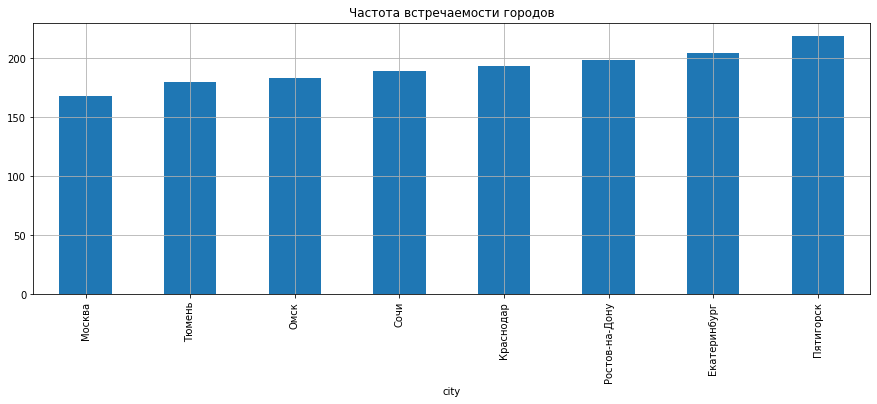

In [33]:
print(users_correct.groupby('city')[['user_id']].agg(['count']).sort_values(by=('user_id', 'count')))
users_correct.groupby('city')[['user_id']].agg(['count']).sort_values(by=('user_id', 'count')) \
.plot(kind='bar', title='Частота встречаемости городов', figsize=(15, 5), legend=False, grid=True);

*Из анализа данных о пользователях видно, что наибольшее количество пользователей из Пятигорска - 219 чел., а наименьшее из Москвы - 168 чел.*

##### На основе данных о пользователях проанализируем сколько пользователей пользуется подпиской, а сколько нет

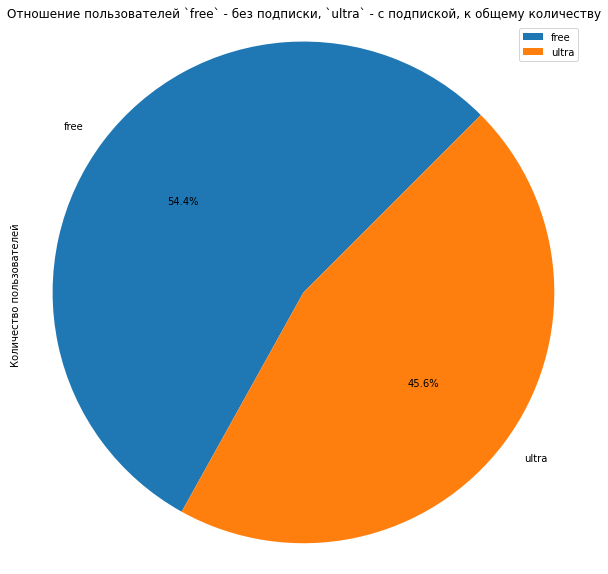

In [34]:
(users_correct.pivot_table(index='subscription_type', values='user_id', aggfunc='count') \
 .plot.pie(y='user_id', figsize=(10,10),  label='Количество пользователей', autopct='%1.1f%%', startangle=45, 
           title='Отношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству'))
plt.axis('equal')
plt.show()

*Из анализа данных о пользователях видно, что большенство пользователей не пользуются подпиской - 54.4%, у которых имеется подписка - 45.6%.*

##### На основе данных о пользователях проанализируем возраст пользователей

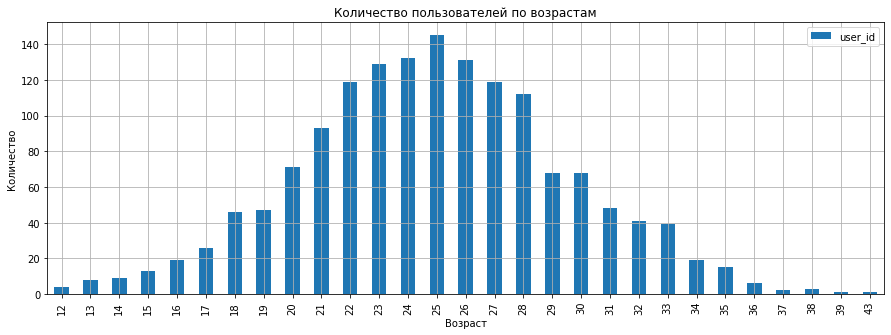

In [35]:
(users_correct.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True) \
 .plot(kind='bar' , grid=True, figsize=(15, 5)))
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [36]:
print('Среднее значение возраста пользователей', users_correct['age'].mean().round(1))
users_correct['age'].describe()

Среднее значение возраста пользователей 24.9


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

*Из анализа данных о пользователях видно, что средний возраст практически равен 25 лет. Также средний возраст практически равен медианному значению. Кроме того, возраст подчиняется нормальному распределению.*

##### На основе данных о поездках пользователей проанализируем расстояние, которое пользователь преодолел за одну поездку

Для анализа данных о расстоянии поездки, добавим столбец distance_type. Логика следующая:
- до 2000 м - до 2 км;
- от 2000 до 4000 - от 2 до 4 км;
- от 4000 до 6000 - от 4 до 6 км;
- от 6000 - от 6 км.

In [37]:
rides_correct['distance'].describe()

count    18063.000000
mean      3070.076461
std       1116.383283
min          0.860000
25%       2542.800000
50%       3133.370000
75%       3775.405000
max       7211.010000
Name: distance, dtype: float64

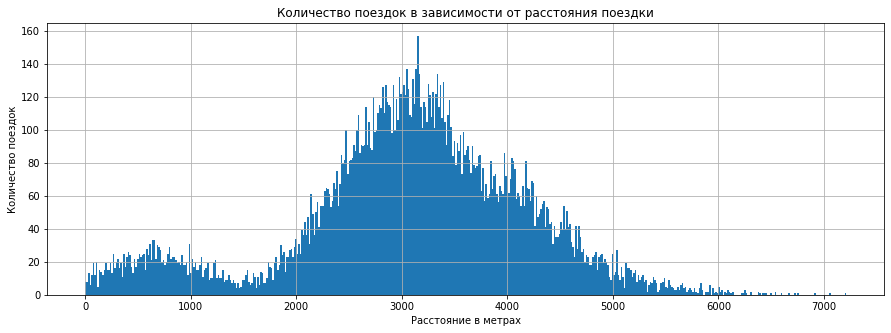

In [38]:
plt.figure(figsize=(15, 5))
plt.hist(rides_correct['distance'], bins=500)
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

*Из анализа данных о поездках пользователей видно, что медианное значение приблизительно равно 3133 метра. Также видно, что распределение отлично от нормального и имеет два пика: первый равняется примерно 700 метрам, а второй 3133 метра.*

##### На основе данных о поездках пользователей проанализируем продолжительность каждой поездки

In [39]:
rides_correct['duration'].describe()

count    18063.000000
mean        17.809801
std          6.085085
min          0.500000
25%         13.602014
50%         17.682157
75%         21.725539
max         40.823963
Name: duration, dtype: float64

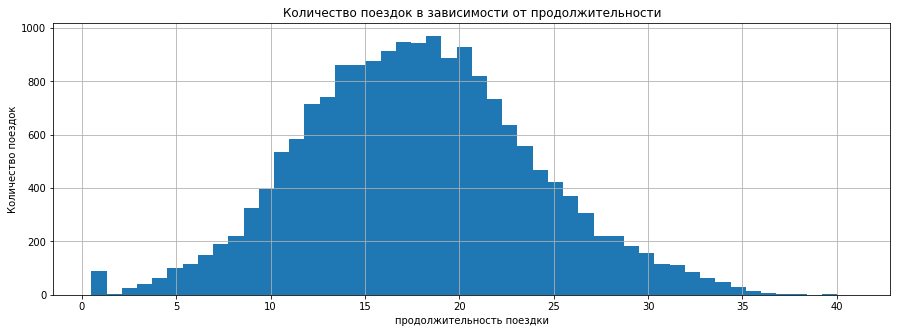

In [40]:
plt.figure(figsize=(15, 5))
plt.hist(rides_correct['duration'], bins=50)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

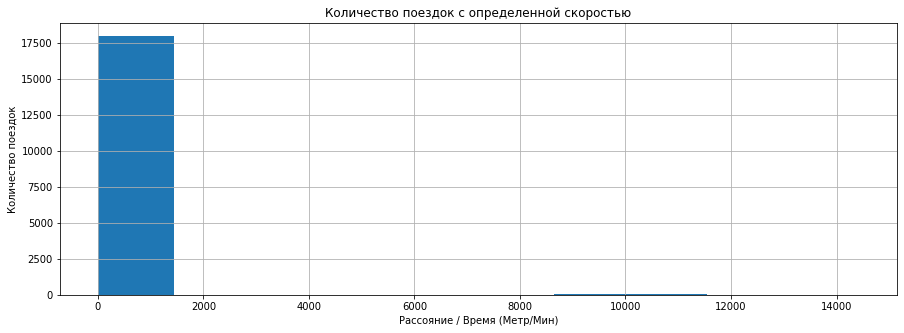

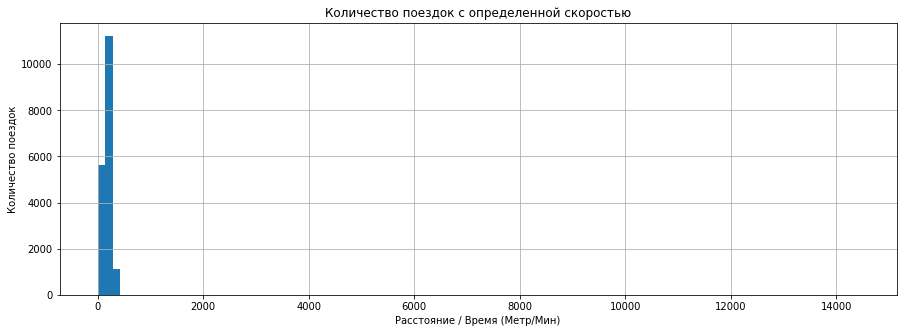

Максимальная скорость перемещения (метр/мин) 14422.02


In [41]:
plt.figure(figsize=(15, 5))
plt.hist(rides_correct['distance'] / rides_correct['duration'])
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Рассояние / Время (Метр/Мин)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
plt.hist(rides_correct['distance'] / rides_correct['duration'], bins=100)
plt.title('Количество поездок с определенной скоростью')
plt.xlabel('Расстояние / Время (Метр/Мин)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

print('Максимальная скорость перемещения (метр/мин)', (rides_correct['distance'] / rides_correct['duration']).max())

*Из анализа данных о поездках пользователей видно, что среднее расстояниие составляет примерно 18 метров. Также видно, что в данных присутсвуют аномальные значения (около 100 поездок меньше 1 метра, скорость перемещения достигает 14 тыс метров/мин, что является невозможным).*

#### Шаг 4. Объединение данных

##### Объединим данные о пользователях с данными о поездках и подписках

In [42]:
users_rides = users_correct.merge(rides_correct, how='left', on='user_id')

In [43]:
users_rides_subscr = users_rides.merge(subscriptions, how='left', on='subscription_type')

In [44]:
users_rides_subscr.head(30)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,15.041884,2021-11-22,11,6,0,199


In [45]:
users_rides_subscr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18063 entries, 0 to 18062
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18063 non-null  int64         
 1   name               18063 non-null  object        
 2   age                18063 non-null  int64         
 3   city               18063 non-null  object        
 4   subscription_type  18063 non-null  object        
 5   distance           18063 non-null  float64       
 6   duration           18063 non-null  float64       
 7   date               18063 non-null  datetime64[ns]
 8   month              18063 non-null  int64         
 9   minute_price       18063 non-null  int64         
 10  start_ride_price   18063 non-null  int64         
 11  subscription_fee   18063 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [46]:
users_rides_subscr[users_rides_subscr.isna().any(axis=1)]

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee


##### Создадим два датафреймя с пользователями с подпиской и без

In [47]:
users_rides_subscr_free = users_rides_subscr.query('subscription_type == "free"')

In [48]:
users_rides_subscr_ultra = users_rides_subscr.query('subscription_type == "ultra"')

##### На основе датафреймов из 4.2 произведем анализ данных о расстоянии и времени поездок

###### Сравним расстояние у пользователей с подпиской и без

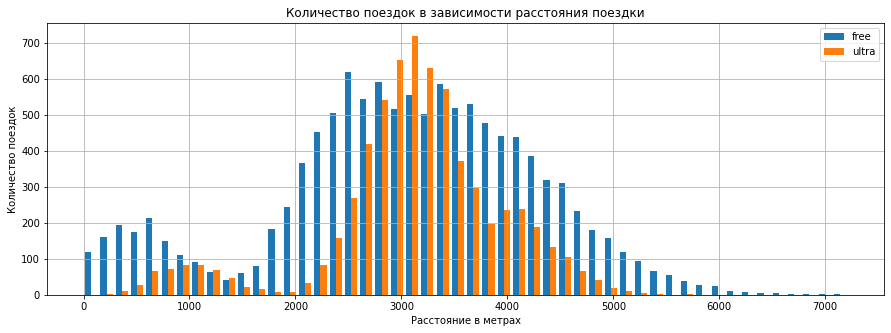

In [49]:
plt.figure(figsize=(15, 5))
plt.hist([users_rides_subscr_free['distance'], users_rides_subscr_ultra['distance']], bins=50, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

In [50]:
users_rides_subscr_free['distance'].describe()

count    11563.000000
mean      3044.572846
std       1245.581044
min          0.860000
25%       2366.400000
50%       3114.280000
75%       3903.810000
max       7211.010000
Name: distance, dtype: float64

In [51]:
users_rides_subscr_ultra['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

*Из анализа данных о расстояние поездок пользователей с подпиской и без видно, что сохраняется распределение относительно исходного датафрейма (п.3.4). Также видно, что среднее расстояние пользователей с подпиской больше (3149 метров), чем без (3045 метров). Кроме того, видно, что среднее значение дополнительного пика с подпиской больше (1000 метров), чем без (500 метров).*

###### Сравним время поездки у пользователей с подпиской и без

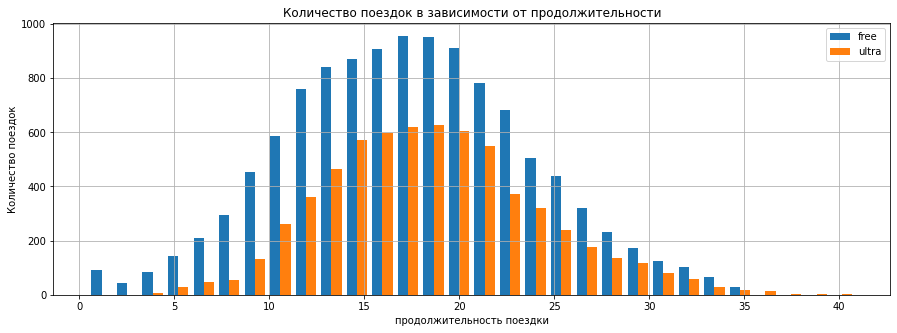

In [52]:
plt.figure(figsize=(15, 5))
plt.hist([users_rides_subscr_free['duration'], users_rides_subscr_ultra['duration']], bins=30, label=['free', 'ultra'])
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

In [53]:
users_rides_subscr_free['duration'].describe()

count    11563.000000
mean        17.398213
std          6.318411
min          0.500000
25%         12.962980
50%         17.334630
75%         21.601341
max         34.948498
Name: duration, dtype: float64

In [54]:
users_rides_subscr_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

*Из анализа данных о продолжительности поездок пользователей с подпиской и без видно, что сохраняется распределение относительно исходного датафрейма (п.3.5). Также видно, что среднее время поездки пользователей с подпиской больше (18.5 мин), чем без (17.4 мин).*

#### Шаг 5. Подсчёт выручки

##### На основе датафрейма из 4.1 найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [55]:
sum_each_user = pd.pivot_table(users_rides_subscr, 
                               index=['user_id', 'month', 'subscription_type'],
                               values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'], 
                               aggfunc=({'distance':{'count', 'sum'}, 'duration': 'sum', 'minute_price': 'mean', 
                                         'start_ride_price': 'mean', 'subscription_fee': 'mean'}))
sum_each_user.columns = ['count', 'distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee']
sum_each_user.head(10)

count  distance   duration  minute_price  \
user_id month subscription_type                                             
1       1     ultra                  2   7027.51  41.416640             6   
        4     ultra                  1    754.16   6.232113             6   
        8     ultra                  2   6723.47  44.776802             6   
        10    ultra                  2   5809.91  31.578017             6   
        11    ultra                  3   7003.50  53.397424             6   
        12    ultra                  2   6751.63  27.203912             6   
2       3     ultra                  3  10187.73  60.959959             6   
        4     ultra                  2   6164.39  39.048633             6   
        6     ultra                  1   3255.34  13.851127             6   
        7     ultra                  2   6780.73  46.170157             6   

                                 start_ride_price  subscription_fee  
user_id month subscription_type                                      
1       1     ultra                             0               199  
        4     ultra                             0               199  
        8     ultra                             0               199  
        10    ultra                             0               199  
        11    ultra                             0               199  
        12    ultra                             0               199  
2       3     ultra                             0               199  
        4     ultra                             0               199  
        6     ultra                             0               199  
        7     ultra                             0               199

##### Добавим столбец с выручкой по каждому клиенту

Округлим данные по столбцу продолжительность поездки и добавим столбец выручка

In [56]:
sum_each_user['duration'] = np.ceil(sum_each_user['duration']).astype('int')

In [57]:
sum_each_user['revenue'] = sum_each_user['start_ride_price'] * sum_each_user['count'] \
+ sum_each_user['minute_price'] * sum_each_user['duration'] + sum_each_user['subscription_fee']
sum_each_user

count  distance  duration  minute_price  \
user_id month subscription_type                                            
1       1     ultra                  2   7027.51        42             6   
        4     ultra                  1    754.16         7             6   
        8     ultra                  2   6723.47        45             6   
        10    ultra                  2   5809.91        32             6   
        11    ultra                  3   7003.50        54             6   
...                                ...       ...       ...           ...   
1534    6     free                   2   3409.47        25             8   
        8     free                   2   7622.45        48             8   
        9     free                   1   4928.17        23             8   
        11    free                   4  13350.02        77             8   
        12    free                   1   2371.71        16             8   

                                 start_ride_price  subscription_fee  revenue  
user_id month subscription_type                                               
1       1     ultra                             0               199      451  
        4     ultra                             0               199      241  
        8     ultra                             0               199      469  
        10    ultra                             0               199      391  
        11    ultra                             0               199      523  
...                                           ...               ...      ...  
1534    6     free                             50                 0      300  
        8     free                             50                 0      484  
        9     free                             50                 0      234  
        11    free                             50                 0      816  
        12    free                             50                 0      178  

[11329 rows x 7 columns]

Сгруппируем по каждому пользователю и найдём сумму, который потратил каждый пользователь. Также построим гистограмму.

        revenue
            sum
user_id        
1          2442
2          2593
3          2809
4          2940
5          2660
...         ...
1530       3218
1531       4454
1532       2378
1533       2610
1534       2522

[1534 rows x 1 columns]


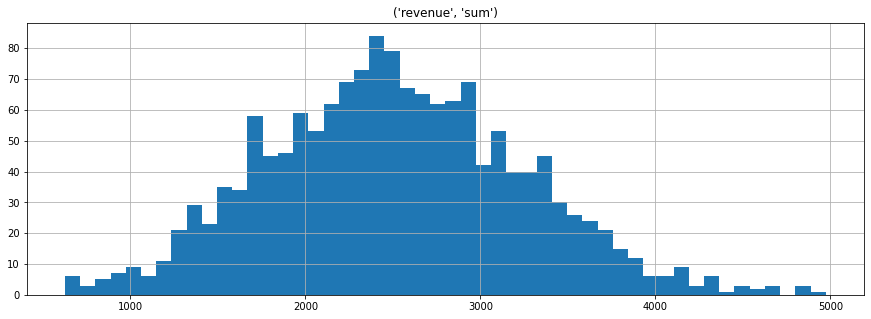

In [58]:
print(sum_each_user.groupby('user_id')[['revenue']].agg(['sum']))
sum_each_user.groupby('user_id')[['revenue']].agg(['sum']).hist(bins=50, figsize=(15, 5));

In [59]:
print(f"Сумма, которую потратили пользователи за год, составляет {sum_each_user['revenue'].sum()} рублей.")

Сумма, которую потратили пользователи за год, составляет 3853403 рублей.


#### Шаг 6. Проверка гипотез

##### Проверим трят ли пользователи с подпиской больше времени на поездку или нет

Выдвинем гипотезы:

Н0: Средняя продолжительность поездок с подпиской и без равна

Н1: Средняя продолжительность поездок с подпиской больше продолжительности поездок без подписок 

Проверим гипотезы, используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [60]:
results = st.ttest_ind(users_rides_subscr_ultra['duration'], users_rides_subscr_free['duration'], equal_var=True, 
                       alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

2.9055924182441005e-34
Отвергаем нулевую гипотезу


*Нулевая гипотеза отвергнута. Есть основания полагать, что средняя продолжительность поездки с подпиской выше, чем без неё. Гистограммы из п.4.3.2 могут это подтверждать.*

##### Проверим гипотезу о том, что среднее расстояние одной поездки не может превышать 3130 метров у пользователей с подпиской

Выдвинем гипотезы:

Н0: Среднее расстояние пользователей с подпиской равно 3130 метрам

Н1: Среднее расстояние пользователей с подпиской больше 3130 метрам

Проверим гипотезы, используем исходные данные о расстояние каждой сессии для подписчиков.

In [61]:
distance = 3130
results = st.ttest_1samp(users_rides_subscr_ultra['distance'], distance, alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.9195362605842414
Не отвергаем нулевую гипотезу


*Не отвергаем нулеваю гипотезу. Есть основания полагать, что среднее расстояние поездки с подпиской не превышает 3130 метров. Гистограммы из п.4.3.1 могут это подтверждать.*

##### Проверим гипотезу о том, что средняя помесечная выручка от пользователей с подпиской выше, чем без

Выдвинем гипотезы:

Н0: Средняя помесечная выручка от пользователей с подпиской и без равна

Н1: Средняя помесечная выручка от пользователей с подпиской больше, чем без 

Проверим гипотезы, используем расчетные данные о выручке из п.5.2

In [62]:
results = st.ttest_ind(sum_each_user.loc[sum_each_user['subscription_fee'] > 0, 'revenue'],
                       sum_each_user.loc[sum_each_user['subscription_fee'] == 0, 'revenue'], equal_var=True, 
                       alternative='greater')
print(results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

3.475692762040471e-35
Отвергаем нулевую гипотезу


*Нулевая гипотеза отвергнута. Есть основания полагать, что средняя помесечная выручка с подпиской выше, чем без неё.*

##### Проверка гипотезы об изменениях в службе техподдержки

Теоретически это две зависимые выборки, иначе - парные. Если в данных некоторая переменная измеряется дважды (количество обращений до обновления и после него) для одних и тех же объектов (пользователь) и имеют одинаковые размеры, тогда можно применить метод scipy.stats.ttest_rel(), при проверке на то что, истинное среднее значение генеральной выборки до изменения больше, чем истинное среднее значение генеральной совокупности после изменения следует указать alternative="less".

Если требования к зависимым выборкам не выполняются, можно воспользоваться методом scipy.stats.ttest_ind().

#### Шаг 7. Распределения

##### Проверка акции с промокодами

При раздаче промокодов в количестве 1161 вероятность, не выполнить план меньше 5.0 %


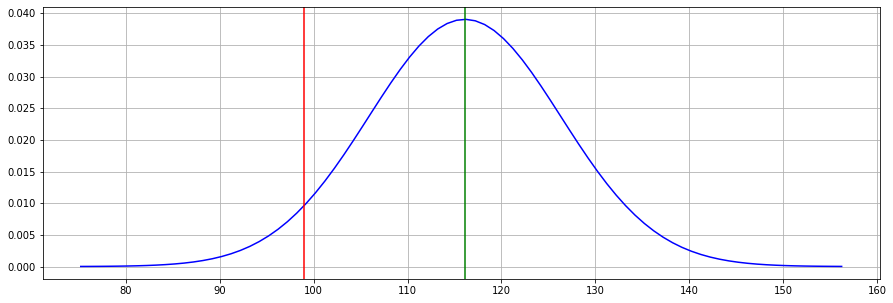

In [63]:
n = 1000
p = 0.1
k = 99
binom_cdf = 0.05

while binom_cdf < binom.cdf(k, n, p):
    n += 1
print(f'При раздаче промокодов в количестве {n} вероятность, не выполнить план меньше {binom.cdf(k, n, p).round(2)*100} %')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)

plt.figure(figsize=(15, 5))
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.grid(True)
plt.show()

*Необходимо раздать как минимум 1161 промокодов для того, чтобы 100 существующих подписчиков продлили подписки (10% от получивших промокоды) с вероятностью 5% не выполнить план.*

##### Проверка рассылок push-уведомлений

Вероятность открытия сообщений: 0.15371708296369768


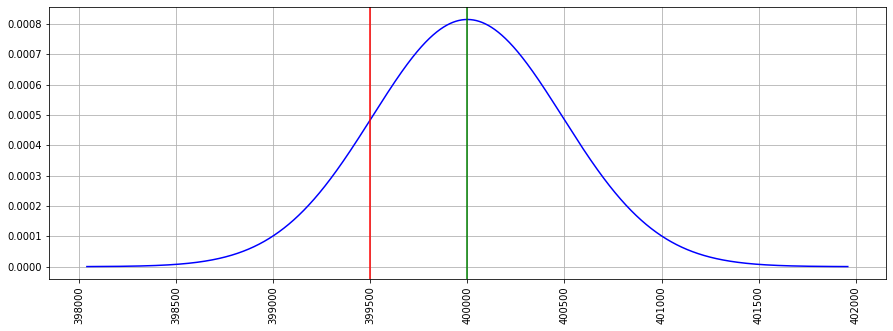

In [64]:
# параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500
# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений:', result)

arange = np.arange((mu - 4 * sigma),(mu + 4 * sigma),1)
plt.figure(figsize=(15, 5))
plt.plot(arange, st.norm.pdf(arange, mu, sigma), 'b-')
plt.xticks(rotation=90)
plt.axvline(x=k, color='red')
plt.axvline(x=mu, color='green')
plt.grid(True)
plt.show()

*Если разослать 1 млн уведомлений, с вероятностью их открытия около 40%, то вероятность того, что их откроют менее 399,5 тыс пользователей равна 15,37%.*

# Выводы

Из анализа данных следует:
1. пропущенных значений нет в данных о пользователей и все столбцы имеют корректный тип данных.
2. пропущенных значений нет в данных о поездках пользователей и столбец с датой имеет вещественный тип данных.
3. пропущенных значений нет в данных о подписках и все столбцы имеют корректный тип данных.
4. наибольшее количество пользователей из Пятигорска - 219 чел., а наименьшее из Москвы - 168 чел.
5. большенство пользователей не пользуются подпиской - 54.4%, у которых имеется подписка - 45.6%.
6. средний возраст практически равен 25 лет. Также средний возраст практически равен медианному значению. Кроме того, возраст подчиняется нормальному распределению.
7. медианное значение приблизительно равно 3133 метра. Также видно, что распределение отлично от нормального и имеет два пика: первый равняется примерно 700 метрам, а второй 3133 метра.
8. среднее расстояниие составляет примерно 18 метров. Также видно, что в данных присутсвуют аномальные значения (около 100 поездок меньше 1 метра, скорость перемещения достигает 14 тыс метров/мин, что является невозможным).
9. расстояние поездок пользователей с подпиской и без видно, что сохраняется распределение относительно исходного датафрейма. Также видно, что среднее расстояние пользователей с подпиской больше (3149 метров), чем без (3045 метров). Кроме того, видно, что среднее значение дополнительного пика с подпиской больше (1000 метров), чем без (500 метров).
10. продолжительности поездок пользователей с подпиской и без видно, что сохраняется распределение относительно исходного датафрейма. Также видно, что среднее время поездки пользователей с подпиской больше (18.5 мин), чем без (17.4 мин).

Проверка гипотез показало следующее:
1. гипотезу о том, что средняя продолжительность поездок с подпиской и без равны отвергается. Есть основания полагать, что средняя продолжительность поездки с подпиской выше, чем без неё.
2. гипотезу о том, что среднее расстояние пользователей с подпиской равно 3130 метрам не отвергается. Есть основания полагать, что среднее расстояние поездки с подпиской не превышает 3130 метров.
3. гипотеза о том, что средняя помесечная выручка от пользователей с подпиской и без равны отвергается. Есть основания полагать, что средняя помесечная выручка с подпиской выше, чем без неё.

Проверка по распределению показало следующее:
1. необходимо раздать как минимум 1161 промокодов для того, чтобы 100 существующих подписчиков продлили подписки (10% от получивших промокоды) с вероятностью 5% не выполнить план.
2. если разослать 1 млн уведомлений, с вероятностью их открытия около 40%, то вероятность того, что их откроют менее 399,5 тыс пользователей равна 15,37%.